<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
# Todo pandas_dataframe.replace(['bad_data_1', 'bad_data_2'], [None, None], inplace=True)

In [54]:
!conda install -c conda-forge missingno -y

Solving environment: done

## Package Plan ##

  environment location: /home/anthelix/anaconda3/envs/pypa

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py37he5f6b98_1         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         151 KB

The following packages will be UPDATED:

  certifi                          2020.6.20-py37hc8dfbb8_0 --> 2020.6.20-py37he5f6b98_1



certifi-2020.6.20    | 151 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [55]:
import pandas as pd
import missingno as msno
import os
import re

In [56]:
#TODO: make the script with try/exept/else conditions. Which tests for check the file?count line before and after?


In [57]:
def dict_name_path():
    '''
    get files in data/data_raw
    return a dic_name of the files name
    '''
    try: 
        # Get the absolute path of parent directory 
        parent = os.path.dirname(os.getcwd()) 
        # Get the absolute path of parent input files and output  files
        data_raw_path = os.path.join(parent,'data', 'data_raw')
        data_path = os.path.join(parent,'data')
        # list of files 
        files = [f for f in os.listdir(data_raw_path) if os.path.isfile(os.path.join(data_raw_path, f))]
        dic_name = {}
        if len(files) < 1:
            raise ValueError(" No files in data/data_raw or no folder data_raw")
    except Exception as e:
        print(e)
    else:
        for f in files:
            name = re.split('\W+',f)[0]
            path_in = os.path.join(data_raw_path,f)
            path_out = os.path.join(data_path,f)
            dic_name[name] = [path_in, path_out]
        return(dic_name)

In [58]:
dic_name = dict_name_path()
print(dic_name)

{'Specialty': ['/home/anthelix/Documents/workflow/databird/projet_review/side_project/data/data_raw/Specialty.csv', '/home/anthelix/Documents/workflow/databird/projet_review/side_project/data/Specialty.csv'], 'Sendinblue_logs': ['/home/anthelix/Documents/workflow/databird/projet_review/side_project/data/data_raw/Sendinblue_logs-2016-07-15_2020-07-21.csv', '/home/anthelix/Documents/workflow/databird/projet_review/side_project/data/Sendinblue_logs-2016-07-15_2020-07-21.csv'], 'Surgeon': ['/home/anthelix/Documents/workflow/databird/projet_review/side_project/data/data_raw/Surgeon.csv', '/home/anthelix/Documents/workflow/databird/projet_review/side_project/data/Surgeon.csv'], 'Laboratory': ['/home/anthelix/Documents/workflow/databird/projet_review/side_project/data/data_raw/Laboratory.csv', '/home/anthelix/Documents/workflow/databird/projet_review/side_project/data/Laboratory.csv'], 'HealthInstitution': ['/home/anthelix/Documents/workflow/databird/projet_review/side_project/data/data_raw/H

In [59]:
def surgeon(motif, dic_name):
    '''
    get Surgeon.csv file
    return dataframe
    '''
    if motif in dic_name.keys():
        try:
            path_in = dic_name[motif][0]
            path_out = dic_name[motif][1]
            name_file = motif
        except Exception as e:
            print(e)
        else:
            try:
                # Work on dataframe
                df_raw = pd.read_csv(path_in)
                colDrop = ['Copy Confirmation', 'Email', 'User ID', 'Deleted']
                df_drop = df_raw.drop(colDrop, axis=1)            
                df_drop = df_drop.apply(lambda x: x.astype(str)\
                                 .str.lower())\
                                 .rename(columns={"ID": "ID_surgeon",\
                                                  "Firstname": "Firstname Surgeon",\
                                                  "Lastname": "Lastname Surgeon"})
                
                #work on Firstname column
                df_drop['Firstname Surgeon'] = df_drop['Firstname Surgeon'].str.title()
                
                #work on Lastname Column
                df_drop['Lastname Surgeon'] = df_drop['Lastname Surgeon'].str.upper()
                if len(df_drop) < 1:
                    raise ValueError(" Dataframe for Surgeon is empty")
                return(df_drop)
            except Exception as e:
                print(e)

In [133]:
motif = 'Surgeon'
df_surgeon = surgeon(motif, dic_name)
df_surgeon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID_surgeon             1277 non-null   object
 1   Firstname Surgeon      1277 non-null   object
 2   Lastname Surgeon       1277 non-null   object
 3   Health Institution ID  1277 non-null   object
dtypes: object(4)
memory usage: 40.0+ KB


In [61]:
def specialty(motif, dic_name):
    '''
    get Specilaty.csv file
    return dataframe
    '''
    if motif in dic_name.keys():
        try:
            path_in = dic_name[motif][0]
            path_out = dic_name[motif][1]
            name_file = motif
        except Exception as e:
            print(e)
        else:
            # Work on dataframe
            df_raw = pd.read_csv(path_in)
            #display(df_raw[df_raw.isnull().any(axis=1)])
            df_drop = df_raw.apply(lambda x: x.astype(str).str.lower())\
                            .rename(columns={"ID": "ID_specialty", "Name": "Specilaty Name"})
            drop_test = df_drop.apply(lambda x: x.str.contains('pélican|test|démo')).any(axis=1)
            df_drop = df_drop[~drop_test]

            #work on Specilaty Name
            df_drop['Specilaty Name'] = df_drop['Specilaty Name'].str.title()

            return(df_drop)

In [62]:
motif = 'Specialty'
df = specialty(motif, dic_name)
df.head(5)

,ID_specialty,Specilaty Name,Specialty Type
0,1,Chirurgie Orthopédique,1
1,2,Chirurgie Vasculaire,0
2,3,Chirurgie Cardiaque,0
3,4,Chirurgie Viscérale,0
4,5,Chirurgie Digestive,0


In [63]:
def operatingSpecialty(motif, dic_name):
    '''
    get 'OperatingSpecialty'.csv file
    return dataframe
    '''
    if motif in dic_name.keys():
        try:
            path_in = dic_name[motif][0]
            path_out = dic_name[motif][1]
            name_file = motif
        except Exception as e:
            print(e)
        else:
            # Work on dataframe
            df_raw = pd.read_csv(path_in)
            df_drop = df_raw.apply(lambda x: x.astype(str).str.lower())\
                            .rename(columns={"ID": "ID_OperatingSpecialty", "Name": "Operating Specilaty Name"})
            #display(df_drop[df_drop.isna().any(axis=1)])
            #work on Operating Specilaty Name
            df_drop['Operating Specilaty Name'] = df_drop['Operating Specilaty Name'].str.title()

            return(df_drop)

In [64]:
motif = 'OperatingSpecialty'
df = operatingSpecialty(motif, dic_name)
df.head(5)

,ID_OperatingSpecialty,Operating Specilaty Name
0,4,Vissage
1,5,Plaques Et Vis
2,6,Enclouage
3,7,Agrafes
4,8,Ligamentoplastie / Arthroscopie


In [65]:
def bodyLocation(motif, dic_name):
    '''
    get BodyLocation.csv file
    return dataframe
    '''
    if motif in dic_name.keys():
        try:
            path_in = dic_name[motif][0]
            path_out = dic_name[motif][1]
            name_file = motif
        except Exception as e:
            print(e)
        else:
            # Work on dataframe
            df_raw = pd.read_csv(path_in)
            #display(df_raw[df_raw.isna().any(axis=1)])
            df_drop = df_raw.apply(lambda x: x.astype(str).str.lower())\
                            .rename(columns={"ID": "ID_bodyLocation", "Name": "Body Location Name"})
            #display(df_drop[df_drop.isna().any(axis=1)])
            #work on Body Location Name
            df_drop['Body Location Name'] = df_drop['Body Location Name'].str.title()

            return(df_drop)

In [66]:
motif = 'BodyLocation'
df = bodyLocation(motif, dic_name)
df.head(5)

,ID_bodyLocation,Body Location Name
0,4,Pied
1,5,Cheville
2,6,Tibia
3,7,Fibula
4,8,Genou


In [67]:
def healthInstitution(motif, dic_name):
    '''
    get HealthInstitution.csv file
    return dataframe
    '''
    if motif in dic_name.keys():
        try:
            path_in = dic_name[motif][0]
            path_out = dic_name[motif][1]
            name_file = motif
        except Exception as e:
            print(e)
        else:
            # Work on dataframe
            df_raw = pd.read_csv(path_in, dtype={'zip code': 'str'})
            colDrop = ['Ad R1', 'A Dr2', 'Affiliated', 'Country', 'County', 'Type']
            df_drop = df_raw.drop(colDrop, axis=1)
            #display(df_drop[df_drop.isnull().any(axis=1)])
            
            df_drop =  df_drop.apply(lambda x: x.astype(str).str.lower())\
                        .rename(columns={"ID": "ID_HealthInstitution", "Name": "HealthInstitution Name",\
                                             "City": "HealthInstitution City", "Zip Code": "HealthInstitution Zip Code"})        
            drop_test = df_drop.apply(lambda x: x.str.contains(r'\bpélican\b|\btest\b|\bmaroc\b')).any(axis=1)
            df_drop = df_drop[~drop_test]
            
            #work on HealthInstitution Name            
            df_drop['HealthInstitution Name'] = df_drop['HealthInstitution Name'].str.title()
            #work on HealthInstitution City
            df_drop['HealthInstitution City'] = df_drop['HealthInstitution City'].str.split('cedex')\
                                                                                .str[0]\
                                                                                .str.upper()
            #workon HealthInstitution Zip Code
            df_drop['HealthInstitution Zip Code'] = df_drop['HealthInstitution Zip Code'].replace('\s+', '', regex=True)
            df_drop['HealthInstitution Zip Code'] =  df_drop['HealthInstitution Zip Code'].apply(lambda x : x.ljust(5, '0'))
            df_drop['HealthInstitution county'] = df_drop['HealthInstitution Zip Code'].str[:2]

            return(df_drop)

In [68]:
motif = 'HealthInstitution'
df = healthInstitution(motif, dic_name)
display(df.sort_values(by=['HealthInstitution Zip Code']).head(2))
print(df['HealthInstitution Zip Code'].str.len().describe())

,ID_HealthInstitution,HealthInstitution Name,HealthInstitution City,HealthInstitution Zip Code,HealthInstitution county
71,77,Clinique St Christophe Courlancy,SOISSONS,02200,02
151,161,Ch De Gap,GAP,05000,05


count    159.0
mean       5.0
std        0.0
min        5.0
25%        5.0
50%        5.0
75%        5.0
max        5.0
Name: HealthInstitution Zip Code, dtype: float64


In [144]:
def laboratory(motif, dic_name):
    '''
    get Laboratory.csv file
    return dataframe
    '''
    if motif in dic_name.keys():
        try:
            path_in = dic_name[motif][0]
            path_out = dic_name[motif][1]
            name_file = motif
        except Exception as e:
            print(e)
        else:
            # drop extra columns
            df_raw = pd.read_csv(path_in, dtype={'zip code': 'str', 'Block Id': 'str'})
            colDrop = ['Ad R1', 'A Dr2', 'Competence', 'Connected', 'Country', 'Description', 'Events', 'Fax',\
                       'Logo Laboratory', 'Mail', 'Non Dis Po', 'Non Member', 'Site', 'Telephone']
            df_drop = df_raw.drop(colDrop, axis=1)
            #display(msno.matrix(df_drop)) ## missingno
            #work with nan values
            df_drop[['Bloc ID', 'Zip Code']] = df_drop[['Bloc ID', 'Zip Code']].fillna('000')
            df_drop['City'] = df_drop['City'].fillna('Unknow')
            #display(df_drop[df_drop.isna().any(axis=1)])
            
            #replace and clean
            df_drop = df_drop.apply(lambda x: x.astype(str).str.lower())\
                            .rename(columns={"ID": "ID_Laboratory", "Name": "Laboratory Name", "Bloc ID": "Laboratory Bloc ID",\
                                             "City": "Laboratory City", "Zip Code": "Laboratory Zip Code"})        
            drop_test = df_drop.apply(lambda x: x.str.contains(r'\bpélican\b|\btest\b|\bmaroc\b')).any(axis=1)
            df_drop = df_drop[~drop_test]
            #work on Laboratory Name
            df_drop['Laboratory Name'] = df_drop['Laboratory Name'].str.title()
            df_drop['Laboratory Name'] = df_drop['Laboratory Name'].replace('\s+', ' ', regex=True)
            #work on Laboratory Bloc Id
            df['Laboratory Bloc ID'] = df['Laboratory Bloc ID'].astype('float')

            #work on Laboratory City
            df_drop['Laboratory City'] = df_drop['Laboratory City'].str.split('cedex')\
                                                                   .str[0]\
                                                                   .replace('\s+', ' ', regex=True)\
                                                                   .str.upper()
            #workon Laboratory Zip Code
            df_drop['Laboratory Zip Code'] = df_drop['Laboratory Zip Code'].replace('\s+', '', regex=True)
            df_drop['Laboratory Zip Code'] =  df_drop['Laboratory Zip Code'].apply(lambda x : x.ljust(5, '0')).str[:5]

            try:
                df_drop['Laboratory Zip Code'] = df_drop['Laboratory Zip Code'].astype('int')
            except:
                df_drop['Laboratory Zip Code'] = df_drop['Laboratory Zip Code'].replace('\D+', 99999, regex=True).astype('int')
            df_drop['Laboratory County'] = df_drop['Laboratory Zip Code'].astype('str').str[:2].astype('int')      


            return(df_drop)

In [145]:
motif = 'Laboratory'
df = laboratory(motif, dic_name)
display(df.head())
df[df.isna().any(axis=1)]
df['Laboratory Bloc ID'].unique()
df['Laboratory Bloc ID'].sort_values()




,ID_Laboratory,Laboratory Name,Laboratory Bloc ID,Laboratory City,Laboratory Zip Code,Laboratory County
1,8,Xlab,0,PARIS,75000,75
2,12,Amplitude,0,VALENCE,26000,26
3,13,Arthrex,0,MARCQ-EN-BAROEUL,59700,59
4,14,Aston & Sem,0,SAINT-ÉTIENNE,42000,42
5,20,Ceraver,0,ROISSY CHARLES DE GAULLES,95957,95


1          0
1133       0
1152       0
1166       0
1172       0
        ... 
1553    98.0
545     98.0
547     98.0
695     98.0
1564    98.0
Name: Laboratory Bloc ID, Length: 1808, dtype: object

In [134]:
def operatingBlock(motif, dic_name):
    '''
    get OperatingBlock.csv file
    return dataframe
    '''
    if motif in dic_name.keys():
        try:
            path_in = dic_name[motif][0]
            path_out = dic_name[motif][1]
            name_file = motif
        except Exception as e:
            print(e)
        else:
            # drop columns
            df_raw = pd.read_csv(path_in)
 
            colDrop = ['Ad R1', 'A Dr2', 'Actor','Contact Email', 'Contact Management', 'Contact Name', 'Country',\
                      'County', 'Delivery Location', 'Disable Arch Iva Ge Auto', 'Logistic', 'Name Eds', 'Overview',\
                      'Pre Reservation', 'Return Location', 'Supplier Management', 'Telephone', 'Surgeon Directory' ]
            df_drop = df_raw.drop(colDrop, axis=1)

            
            #Deal with nan values
            df_drop[['Health Institution ID','Zip Code']] = df_drop[['Health Institution ID','Zip Code']].fillna('000')
            df_drop['City'] = df_drop['City'].fillna('Unknow')
            
            df_drop = df_drop.apply(lambda x: x.astype(str).str.lower())\
                             .rename(columns={"ID": "ID_OperatingBlock", "Name": "OperatingBlock Name",\
                                             "City": "OperatingBlock City", "Zip Code": "OperatingBlock Zip Code"})
            
            drop_test = df_drop.apply(lambda x: x.str.contains(r'\bpélican\b|\btest\b|\bmaroc\b')).any(axis=1)
            df_drop = df_drop[~drop_test]
            #work on OperatingBlock Name
            df_drop['OperatingBlock Name'] = df_drop['OperatingBlock Name'].str.title().replace('\s+', ' ', regex=True)
            
            #work on OperatingBlock City
            df_drop['OperatingBlock City'] = df_drop['OperatingBlock City'].str.split('cedex')\
                                                                   .str[0]\
                                                                   .replace('\s+', ' ', regex=True)\
                                                                   .str.upper()
            #workon OperatingBlock Zip Code
            df_drop['OperatingBlock Zip Code'] = df_drop['OperatingBlock Zip Code'].replace('\s+', '', regex=True).replace('\.0', '', regex=True)\
                                                                                   .apply(lambda x : x.ljust(5, '0'))
            df_drop['OperatingBlock County'] = df_drop['OperatingBlock Zip Code'].str[:2]
            
            #work on Health Institution ID
            df_drop['Health Institution ID'] = df_drop['Health Institution ID'].replace('\.0', '', regex=True)

            return(df_drop)

In [135]:
motif = 'OperatingBlock'
df = operatingBlock(motif, dic_name)
display(df.sample(5))
df[df.isna().any(axis=1)]

,ID_OperatingBlock,OperatingBlock Name,OperatingBlock City,Health Institution ID,OperatingBlock Zip Code,OperatingBlock County
125,133,Pharmacie - Clinique Jules Verne,UNKNOW,92,00000,0
167,175,Stérilisation - Louis Pasteur (Nancy),ESSEY-LÈS-NANCY,123,54271,54
47,52,Bloc Opératoire Clinique St Hilaire,ROUEN,52,76044,76
244,258,Clinique Monceau - Admin,UNKNOW,125,00000,0
413,435,Pharmacie - Ch De Boulogne Sur Mer,UNKNOW,170,00000,0


,ID_OperatingBlock,OperatingBlock Name,OperatingBlock City,Health Institution ID,OperatingBlock Zip Code,OperatingBlock County


In [73]:
def fosUserUser(motif, dic_name):
    '''
    get FosUserUser.csv file
    return dataframe
    '''
    if motif in dic_name.keys():
        try:
            path_in = dic_name[motif][0]
            path_out = dic_name[motif][1]
            name_file = motif
        except Exception as e:
            print(e)
        else:
            # Work on dataframe
            df_raw = pd.read_csv(path_in, dtype={'zip code': 'str'})
            colDrop = ['Admin Lab', 'Biography', 'By Default','Cg U','Confirmation Token',\
                       'Credentials Expire At', 'Credentials Expired', 'Date Of Birth', 'Email',\
                       'Email Canonical', 'Enabled', 'Expired', 'Gender','Locale', 'Locked',\
                       'Password', 'Password Requested At', 'Phone', 'Roles', 'Salt','Surgeon',\
                       'Timezone', 'Username Canonical', 'Website', 'Expires At']
            df_drop = df_raw.drop(colDrop, axis=1)
            #display(msno.matrix(df_drop)) ## missingno

            #Deal with nan values
            mystring = ['Firstname','Lastname', 'Username']
            myinteger = ['Laboratory ID','Operating Block ID', 'Surgeon Entity ID' ]
            mytimeseries = ['Last Login',  ]
            df_drop[mytimeseries] = df_drop[mytimeseries].fillna('000')
            df_drop[myinteger] = df_drop[myinteger].fillna('000')            
            df_drop[mystring] = df_drop[mystring].fillna('Unknow')
            #display(df_drop[df_drop.isnull().any(axis=1)])

            df_drop =  df_drop.apply(lambda x: x.astype(str).str.lower())\
                        .rename(columns={"ID": "ID_FosUserUser", "Firstname": "FosUserUser Firstname",\
                                             "Lastname": "FosUserUser Lastname", "Laboratory ID": "FosUserUser Laboratory ID",\
                                             "Operating Block ID": "FosUserUser Operating Block ID","Surgeon Entity ID":"FosUserUser Surgeon Entity ID",\
                                             "Username":"FosUserUser Username"})        
            drop_test = df_drop.apply(lambda x: x.str.contains(r'\bpélican\b|\btest\b|\bmaroc\b')).any(axis=1)
            df_drop = df_drop[~drop_test]
            
            #work on string            
            df_drop['FosUserUser Firstname'] = df_drop['FosUserUser Firstname'].str.title()
            df_drop['FosUserUser Lastname'] = df_drop['FosUserUser Lastname'].str.upper()
            #work on FosUserUser Operating Block ID
            df_drop['FosUserUser Operating Block ID'] = df_drop['FosUserUser Operating Block ID'].replace('\.0', '', regex=True)
            #work on FosUserUser Operating Block ID
            df_drop['FosUserUser Surgeon Entity ID'] = df_drop['FosUserUser Surgeon Entity ID'].replace('\.0', '', regex=True)
            #work on FosUserUser Operating Block ID
            df_drop['FosUserUser Laboratory ID'] = df_drop['FosUserUser Laboratory ID'].replace('\.0', '', regex=True)
            #display(msno.matrix(df_drop))
            
            return(df_drop)

In [74]:
motif = 'FosUserUser'
df = fosUserUser(motif, dic_name)
display(df.sample(5))
df[df.isna().any(axis=1)]

,ID_FosUserUser,FosUserUser Firstname,FosUserUser Lastname,Created At,Dt Y Pe,FosUserUser Laboratory ID,Last Login,FosUserUser Operating Block ID,FosUserUser Surgeon Entity ID,Updated At,FosUserUser Username
301,2210,Natacha,HOFFER,2018-06-28t15:35:27,operatingblockuser,000,2019-10-08t15:29:17,168,000,2019-10-08t15:29:17,hofferna
321,2230,Alexandra,FOUDRIN,2018-07-24t10:27:47,operatingblockuser,000,2019-12-17t10:38:09,140,000,2019-12-17t10:38:09,foudrin
1011,3023,Françoise,TAMZI,2020-03-06t15:26:05,operatingblockuser,000,000,83,000,2020-03-06t15:26:05,ftamzi
858,2843,Hôpital Privé Saint Martin - Admin,HÔPITAL PRIVÉ SAINT MARTIN - ADMIN,2019-12-06t15:36:21,operatingblockuser,000,2019-12-19t09:42:26,339,000,2019-12-19t09:42:26,hôpital privé saint martin - admin
238,2140,Eric,DE KLEERMAEKER,2018-05-09t17:09:48,laboratoryuser,381,2019-12-12t21:10:35,000,000,2019-12-12t21:10:35,dkl


,ID_FosUserUser,FosUserUser Firstname,FosUserUser Lastname,Created At,Dt Y Pe,FosUserUser Laboratory ID,Last Login,FosUserUser Operating Block ID,FosUserUser Surgeon Entity ID,Updated At,FosUserUser Username


In [75]:
def request(motif, dic_name):
    '''
    get Request.csv file
    return dataframe
    '''
    if motif in dic_name.keys():
        try:
            path_in = dic_name[motif][0]
            path_out = dic_name[motif][1]
            name_file = motif
        except Exception as e:
            print(e)
        else:
            # Work on dataframe
            keepCols = ['ID','Ch Iru Rg Ical Type','Chosen Laboratory ID','Date','End Date','Expected Delivery Date','Expected Material',\
                        'First Operation Date','Instrument Type','Last Operation Date','Location ID','Operating Block User ID','Recovery Date',\
                        'Specialty Ch Iru Rg Ical ID','Specialty ID','Surgeon','Surgeon Entity ID']
            df_drop = pd.read_csv(path_in, usecols=keepCols)
            print(list(df_drop.columns))
            print(df_drop.columns)

            #display(msno.matrix(df_drop)) ## missingno
            
            #Deal with nan values
            mystring = ['Expected Material', 'Instrument Type', 'Surgeon', 'Expected Material', 'Instrument Type']
            myinteger = ['Chosen Laboratory ID','Location ID', 'Specialty Ch Iru Rg Ical ID',\
                         'Specialty ID', 'Surgeon Entity ID', 'Ch Iru Rg Ical Type']
            mytimeseries = ['First Operation Date','Last Operation Date', 'Recovery Date', 'Expected Delivery Date']
            df_drop[mytimeseries] = df_drop[mytimeseries].fillna('000')
            df_drop[myinteger] = df_drop[myinteger].fillna('000')            
            df_drop[mystring] = df_drop[mystring].fillna('Unknow')
            
            df_drop = df_drop.apply(lambda x: x.astype(str).str.lower())\
                            .rename(columns={"ID": "ID_Request", "Ch Iru Rg Ical Type": "Chirurgical Type",\
                                             "Specialty Ch Iru Rg Ical ID":"Specialty Chirurgical ID"})
            drop_test = df_drop.apply(lambda x: x.str.contains('pélican|test|démo')).any(axis=1)
            df_drop = df_drop[~drop_test]

            #work on Instrument Type and Expected Material
            df_drop['Instrument Type'] = df_drop['Instrument Type'].str.title()
            df_drop['Expected Material'] = df_drop['Expected Material'].str.title()
            df_drop['Surgeon'] = df_drop['Surgeon'].str.upper()
            myinteger = ['Chosen Laboratory ID','Location ID', 'Specialty Chirurgical ID',\
                         'Specialty ID', 'Surgeon Entity ID', "Chirurgical Type"]
            for cols in myinteger:
                df_drop[cols] = df_drop[cols].replace('\.0', '', regex=True)
                       
            return(df_drop)

In [76]:
motif = 'Request'
df = request(motif, dic_name)
df.head()
df[df.isna().any(axis=1)]

['ID', 'Ch Iru Rg Ical Type', 'Chosen Laboratory ID', 'Date', 'End Date', 'Expected Delivery Date', 'Expected Material', 'First Operation Date', 'Instrument Type', 'Last Operation Date', 'Location ID', 'Operating Block User ID', 'Recovery Date', 'Specialty Ch Iru Rg Ical ID', 'Specialty ID', 'Surgeon', 'Surgeon Entity ID']
Index(['ID', 'Ch Iru Rg Ical Type', 'Chosen Laboratory ID', 'Date', 'End Date',
       'Expected Delivery Date', 'Expected Material', 'First Operation Date',
       'Instrument Type', 'Last Operation Date', 'Location ID',
       'Operating Block User ID', 'Recovery Date',
       'Specialty Ch Iru Rg Ical ID', 'Specialty ID', 'Surgeon',
       'Surgeon Entity ID'],
      dtype='object')


,ID_Request,Chirurgical Type,Chosen Laboratory ID,Date,End Date,Expected Delivery Date,Expected Material,First Operation Date,Instrument Type,Last Operation Date,Location ID,Operating Block User ID,Recovery Date,Specialty Chirurgical ID,Specialty ID,Surgeon,Surgeon Entity ID


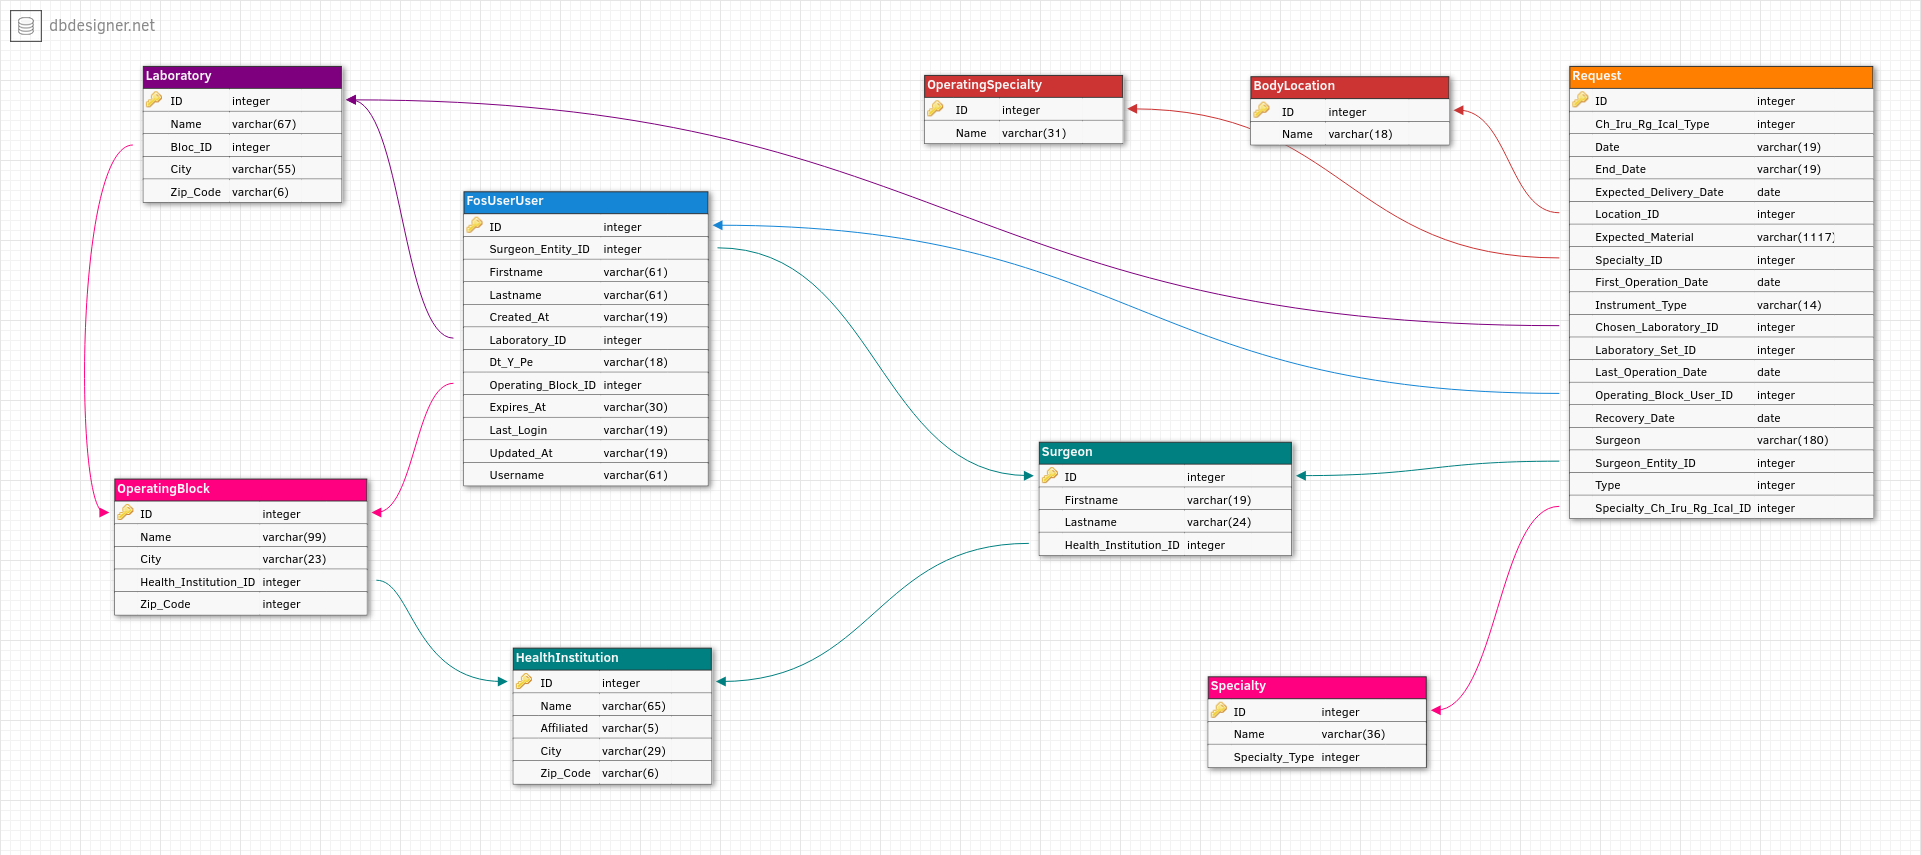

* **Data unknow or 000 in the wvhole cs**
    * laboratory	: 
        * Laboratory Bloc ID 	
        * Laboratory City 	
        * Laboratory Zip Code 	
        * Laboratory County
    * operatingBlock
        * OperatingBlock City 	
        * Health Institution ID 	
        * OperatingBlock Zip Code 	
        * OperatingBlock County
    * fosUserUser
        * FosUserUser Laboratory ID 	
        * Last Login 	
        * FosUserUser Operating Block ID 	
        * FosUserUser Surgeon Entity ID
    * request
        * Chirurgical Type
        * Chosen Laboratory ID 	Date
        * Expected Material
        * Instrument Type
        * Location ID
        * Specialty Chirurgical ID
        * Specialty ID
        * Surgeon 	
        * Surgeon Entity ID
        


In [77]:
%who function

bodyLocation	 dict_name_path	 fosUserUser	 healthInstitution	 laboratory	 myMain	 operatingBlock	 operatingSpecialty	 request	 
sendinblue	 specialty	 surgeon	 


In [78]:
motif = 'Sendinblue_logs'
path_in = dic_name[motif][0]
path_out = dic_name[motif][1]
name_file = motif
df_raw = pd.read_csv(path_in)


In [79]:
dfDrop = df_raw.copy().drop_duplicates()
dfDrop = dfDrop.drop(['frm', 'mid', 'st_text', 'tag'], axis=1)
pat = '([A-Z][0-9]{5}[a-z]?)'
dfDrop['Request ID'] = dfDrop['sub'].str.extract(pat)
dfDrop['_test'] = dfDrop['sub'].str.replace(pat,'')
dfDrop['Status'] = '99'
dfDrop.head(10)

,ts,sub,email,Request ID,_test,Status
0,21-07-2020 12:03:35,Demande de prêt : A36518,sergedmt@gmail.com,A36518,Demande de prêt :,99
1,21-07-2020 12:01:11,A35996 : Nouvelle demande,advortho@serf.fr,A35996,: Nouvelle demande,99
2,21-07-2020 12:00:22,A34993 : prêt pour l'enlevement,service.prets@stryker.com,A34993,: prêt pour l'enlevement,99
3,21-07-2020 12:00:17,Demande de prêt : A36518,sergedmt@gmail.com,A36518,Demande de prêt :,99
4,21-07-2020 12:00:04,Demande de prêt : A36518,sergedmt@gmail.com,A36518,Demande de prêt :,99
5,21-07-2020 11:59:51,Demande de prêt : A36518,sergedmt@gmail.com,A36518,Demande de prêt :,99
6,21-07-2020 11:59:26,Demande de prêt : A36518,sergedmt@gmail.com,A36518,Demande de prêt :,99
7,21-07-2020 11:59:13,Demande de prêt : A36518,sergedmt@gmail.com,A36518,Demande de prêt :,99
8,21-07-2020 11:57:59,Demande de prêt : A36518,sergedmt@gmail.com,A36518,Demande de prêt :,99
9,21-07-2020 11:57:33,Demande de prêt : A36518,sergedmt@gmail.com,A36518,Demande de prêt :,99


In [80]:
def sendinblue(motif, dic_name):
    '''
    get sendinblue_lod + date.csv file
    return dataframe
    '''
    if motif in dic_name.keys():
        try:
            path_in = dic_name[motif][0]
            path_out = dic_name[motif][1]
            name_file = motif
        except Exception as e:
            print(e)
        else:
            try:
                # Work on dataframe
                df_raw = pd.read_csv(path_in)
                dfDrop = df_raw.copy().drop_duplicates()
                pat = '([A-Z][0-9]{5}[a-z]?)'
                dfDrop['Request ID'] = dfDrop['sub'].str.extract(pat)
                #dfDrop['_test'] = dfDrop['sub'].str.replace(pat,'')
                dfDrop['Request ID'].fillna('Unknow', inplace=True)            
                #Create a 'Status' column with default value set to 'ok'
                dfDrop['Status'] = '99'
            except Exception as e:
                print(e)
            else:
                mask = (dfDrop['sub'].str.contains(pat = '(?:Demande de prêt)'))
                dfDrop.loc[mask,'Status'] = 'Demande de prêt'

                mask = (dfDrop['sub'].str.contains(pat = '(?:Nouvelle demande)'))
                dfDrop.loc[mask,'Status'] = 'Nouvelle demande'

                mask = (dfDrop['sub'].str.contains(pat = '(?:a bien été prise en compte)'))
                dfDrop.loc[mask,'Status'] = 'Demande prise en compte'

                mask = (dfDrop['sub'].str.contains(pat = '(?:prêt pour l\'enlevement)'))
                dfDrop.loc[mask,'Status'] = 'Pret pour enlevement'

                mask = (dfDrop['sub'].str.contains(pat = '(?:Confirmation de réservation)'))
                dfDrop.loc[mask,'Status'] = 'Confirmation de réservation'

                mask = (dfDrop['sub'].str.contains(pat = '(?:relance)'))
                dfDrop.loc[mask,'Status'] = 'Relance'

                mask = (dfDrop['sub'].str.contains(pat = '(?: réponse positive)', regex=True))
                dfDrop.loc[mask,'Status'] = 'Demande Reponse positive'

                mask = (dfDrop['sub'].str.contains(pat = '(?: réponse négative)', regex=True))
                dfDrop.loc[mask,'Status'] = 'Demande Reponse negative'

                mask = (dfDrop['sub'].str.contains(pat = '(?:Inscription sur notre)'))
                dfDrop.loc[mask,'Status'] = 'Inscription'

                mask = (dfDrop['sub'].str.contains(pat = '(?:non retenu)'))
                dfDrop.loc[mask,'Status'] = 'Demande non retenu'

                mask = (dfDrop['sub'].str.contains(pat = '(?:An Error Occurred)'))
                dfDrop.loc[mask,'Status'] = 'Error'

                mask = (dfDrop['sub'].str.contains(pat = '(?:est terminée)'))
                dfDrop.loc[mask,'Status'] = 'Demande terminee'

                mask = (dfDrop['sub'].str.contains(pat = '(?: \:\spré-réservation)', regex=True))
                dfDrop.loc[mask,'Status'] = 'Demande pre-reservation'

                mask = (dfDrop['sub'].str.contains(pat = '(?:a été annulée)'))
                dfDrop.loc[mask,'Status'] = 'Demande annulee'

                mask = (dfDrop['sub'].str.contains(pat = '(?:est terminée)'))
                dfDrop.loc[mask,'Status'] = 'Demande terminee'

                mask = (dfDrop['sub'].str.contains(pat = '(?: \:\sréservation annulée)', regex=True))
                dfDrop.loc[mask,'Status'] = 'Reservation annulee'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^réponse positive$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'Reponse positive Autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^prêt[A-Z][0-9]{5}[a-z]?$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'Pret Autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^réservation$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'Reservation Autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^retenu$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'Retenu autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:confirmation de réservation)'))
                dfDrop.loc[mask,'Status'] = 'Confirmation de reservation x'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^Aucun$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'Aucun autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^réservation annulée$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'reservation annulee autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^été annulée$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'ete annulee autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^été$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'ete autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^Découvrez Arsenal Chirurgical \!$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'Decouvrez Arsenal autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^étécompte$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'ete compte autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^demande$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'demande autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^Vous avez reçu un nouveau message de Roxanne$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'Message Roxanne autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^prêtl\'enlevement$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'enlevement pret autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^pré-réservation$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'pre-reservation autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^You received a new message from Roxanne$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'Roxanne autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^prêt$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'pret autre'

                mask = (dfDrop['sub'].str.contains(pat = '(?:^terminée$)', regex=True))
                dfDrop.loc[mask,'Status'] = 'terminee autre'


                dfDrop.drop(['tag', 'mid','email', 'sub' ], 1, inplace=True)
                dfDrop = dfDrop.rename(columns= {'st_text': 'Status message', 'ts':'Timestamp', 'frm':'From', 'Status': "Request Status" })

    return(dfDrop)

#dfDrop.sort_values(by='Status').head(20)


In [81]:
motif = 'Sendinblue_logs'
df = sendinblue(motif, dic_name)


In [82]:
display(df.sample(20))
df[df.isna().any(axis=1)]

,Status message,Timestamp,From,Request ID,Request Status
412658,Cliqué,05-12-2019 11:33:40,contact@arsenalchirurgical.com,A27380,Nouvelle demande
104412,Ouvert,08-06-2020 09:09:21,contact@arsenalchirurgical.com,A34179,Demande de prêt
379281,Cliqué,27-12-2019 09:39:09,contact@arsenalchirurgical.com,A28233,Nouvelle demande
40967,Envoyé,01-07-2020 10:53:17,contact@arsenalchirurgical.com,A35582,Demande prise en compte
257241,1ère ouverture,20-02-2020 14:11:06,contact@arsenalchirurgical.com,A31057,Demande de prêt
704847,Délivré,29-05-2019 11:47:12,contact@arsenalchirurgical.com,A19578,Confirmation de réservation
47445,Délivré,29-06-2020 14:02:26,contact@arsenalchirurgical.com,A35447,Reservation annulee
111214,Envoyé,04-06-2020 11:25:55,contact@arsenalchirurgical.com,A34042,Demande prise en compte
268296,Délivré,17-02-2020 12:54:56,contact@arsenalchirurgical.com,A30167,Demande annulee
13083,Ouvert,13-07-2020 12:39:18,contact@arsenalchirurgical.com,A35904,Nouvelle demande


,Status message,Timestamp,From,Request ID,Request Status


In [83]:
def myMain():
    myDict = {"Surgeon":surgeon, "OperatingSpecialty":operatingSpecialty, "BodyLocation": bodyLocation,\
              "FosUserUser":fosUserUser,"HealthInstitution":healthInstitution, "Laboratory":laboratory,\
              "OperatingBlock" : operatingBlock, "Request": request, "Specialty" : specialty, "Sendinblue_logs": sendinblue}
    dic_name = dict_name_path()
    path = './../data/data_clean/'
    for name, myfunc in myDict.items():
        df_name = 'df_'+name
        name_csv = name+'_clean.csv'
        print(path+name_csv)
        myDict[name](name, dic_name).to_csv (path+name_csv, encoding = 'utf-8')
    return()        

In [84]:
myMain()

./../data/data_clean/Surgeon_clean.csv
./../data/data_clean/OperatingSpecialty_clean.csv
./../data/data_clean/BodyLocation_clean.csv
./../data/data_clean/FosUserUser_clean.csv
./../data/data_clean/HealthInstitution_clean.csv
./../data/data_clean/Laboratory_clean.csv
./../data/data_clean/OperatingBlock_clean.csv
./../data/data_clean/Request_clean.csv
['ID', 'Ch Iru Rg Ical Type', 'Chosen Laboratory ID', 'Date', 'End Date', 'Expected Delivery Date', 'Expected Material', 'First Operation Date', 'Instrument Type', 'Last Operation Date', 'Location ID', 'Operating Block User ID', 'Recovery Date', 'Specialty Ch Iru Rg Ical ID', 'Specialty ID', 'Surgeon', 'Surgeon Entity ID']
Index(['ID', 'Ch Iru Rg Ical Type', 'Chosen Laboratory ID', 'Date', 'End Date',
       'Expected Delivery Date', 'Expected Material', 'First Operation Date',
       'Instrument Type', 'Last Operation Date', 'Location ID',
       'Operating Block User ID', 'Recovery Date',
       'Specialty Ch Iru Rg Ical ID', 'Specialty I

()